### Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## INDEX :-
## 1. Importing Required Libraries

## 2. Loading the Dataset

## 3. Exploratory Data Analysis

## Understanding the dataset

* Head of the dataset
* Shape of the data set
* Types of columns
* Information about data set
* Summary of the data set

###  b. Data Cleaning
* Dropping duplicate values
* Checking NULL values
* Checking for 0 value

## 4. Data Visualization
Here we are going to plot :-
* Count Plot :- to see if the dataset is balanced or not
* Histograms :- to see if data is normally distributed or skewed
* Box Plot :- to analyse the distribution and see the outliers
* Scatter plots :- to understand relationship between any two variables
* Pair plot :- to create scatter plot between all the variables

## 5. Feature Selection

## 6. Handling Outliers

## 7. Split the Data Frame into X and y

## 8. TRAIN TEST SPLIT

## 9. Build the Classification Algorithm

### 9.1 Logistic Regression

### 9.2 Naive Bayes





# 1) Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 2) Load the DataSet

In [4]:
df =pd.read_csv("/Users/bhojraj/Downloads/water_potability.csv")

# 3)  Exploratory Data Analysis

## 3) Understanding the Dataset

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.shape

(3276, 10)

In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
df.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Conclusion:- In above dataset we can see that the minimum value is 0 , the PH value of water indicates extreme level of acids in water so it cant be drinkable , so we need to replace this value with mean and median of the specific columns. 

## b) Data Cleaning.
* Dropping Duplicate values
* checking NULL values
* Checking for 0 values and replacing it

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### In above Dataset we can see that there is so many null values , which means we need to either drop these rows or fill them with suitable vlaues , since there are so many null values so dropping them would be not better decision , we can fill them with mean or median.

In [12]:
df['ph'] = df['ph'].fillna(df['ph'].mean())

In [13]:
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())

In [14]:
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [15]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Now we had fill all the null values 

## 4. Data Visualization
Here we are going to plot :-
* Count Plot :- to see if the dataset is balanced or not
* Histograms :- to see if data is normally distributed or skewed
* Box Plot :- to analyse the distribution and see the outliers
* Scatter plots :- to understand relationship between any two variables
* Pair plot :- to create scatter plot between all the variables


<Axes: xlabel='Potability', ylabel='count'>

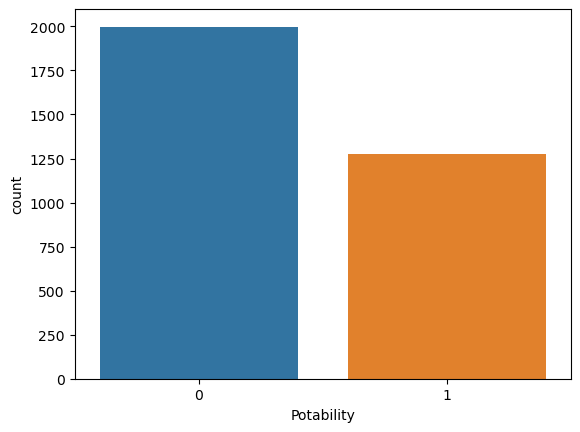

In [16]:
sns.countplot(x = 'Potability',data = df) # to see the dataset is balanced or not.

## From the above countplot we can see that there is more drinkable water then non-drinkable water

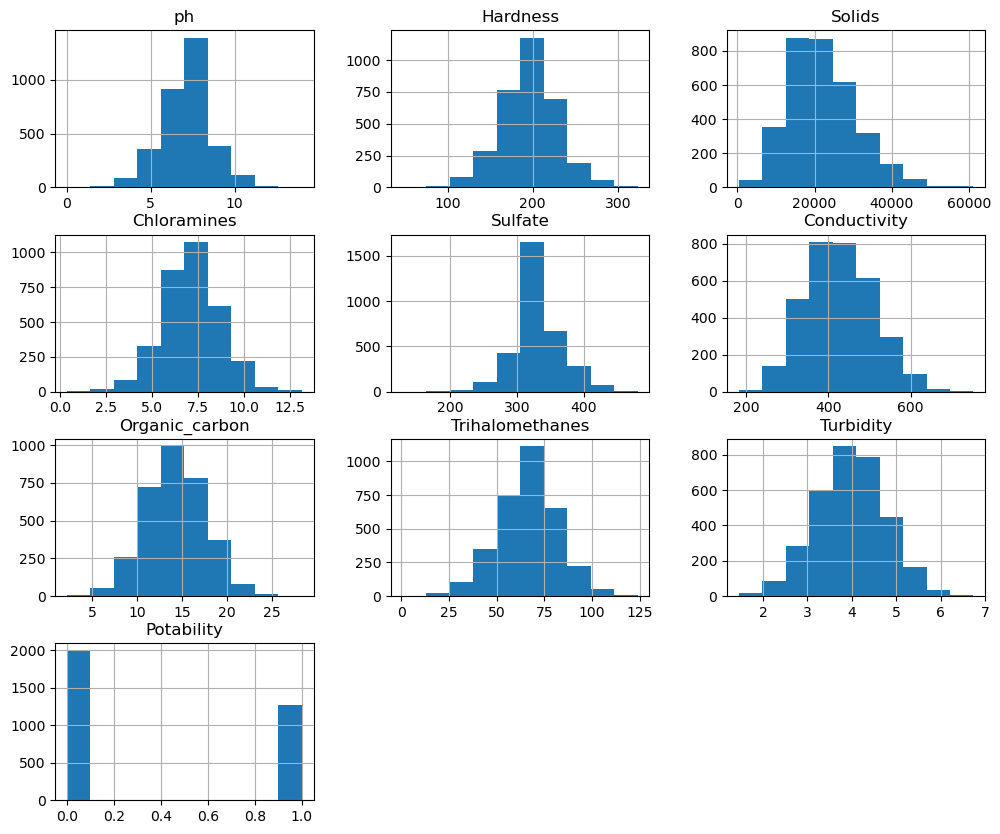

In [17]:
df.hist(bins = 10,figsize = (12,10)) # to see the dataset is normally distributed or not
plt.show()

 ### Here we can see , all the data is normally distributed, it seems the 'Solids', 'conductivity' etc are skwed distributed ans have outliers

In [18]:
# we need to plot the boxplot to analyse the distribution and see the outliers

<Axes: xlabel='Turbidity'>

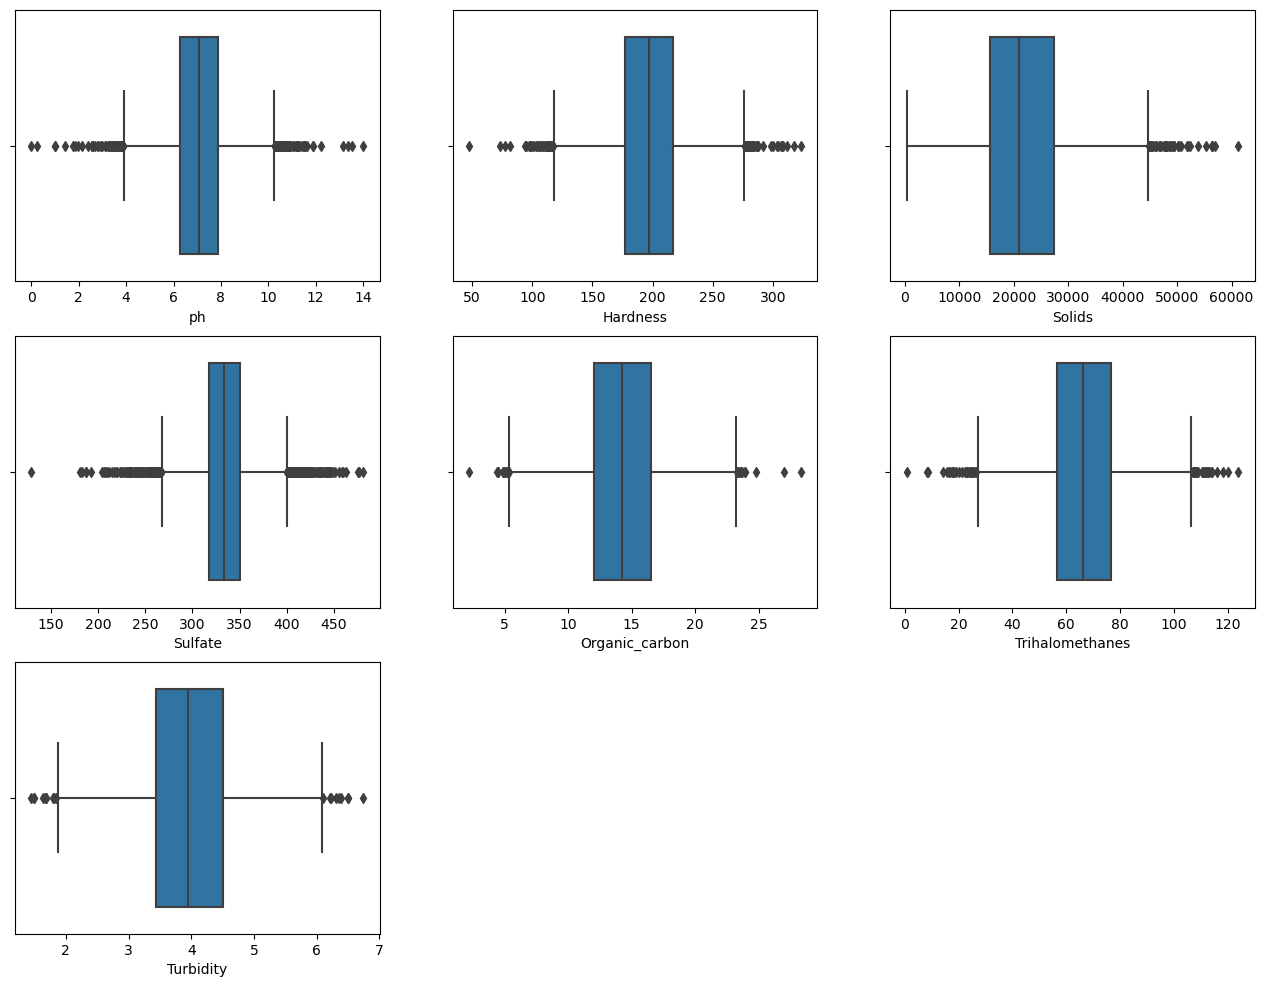

In [19]:
plt.figure(figsize = (16,12))
sns.set_style = 'whitegrid'
plt.subplot(3,3,1)
sns.boxplot(x = 'ph', data =df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Hardness', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Solids', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Sulfate', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'Organic_carbon', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'Trihalomethanes', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Turbidity', data = df)




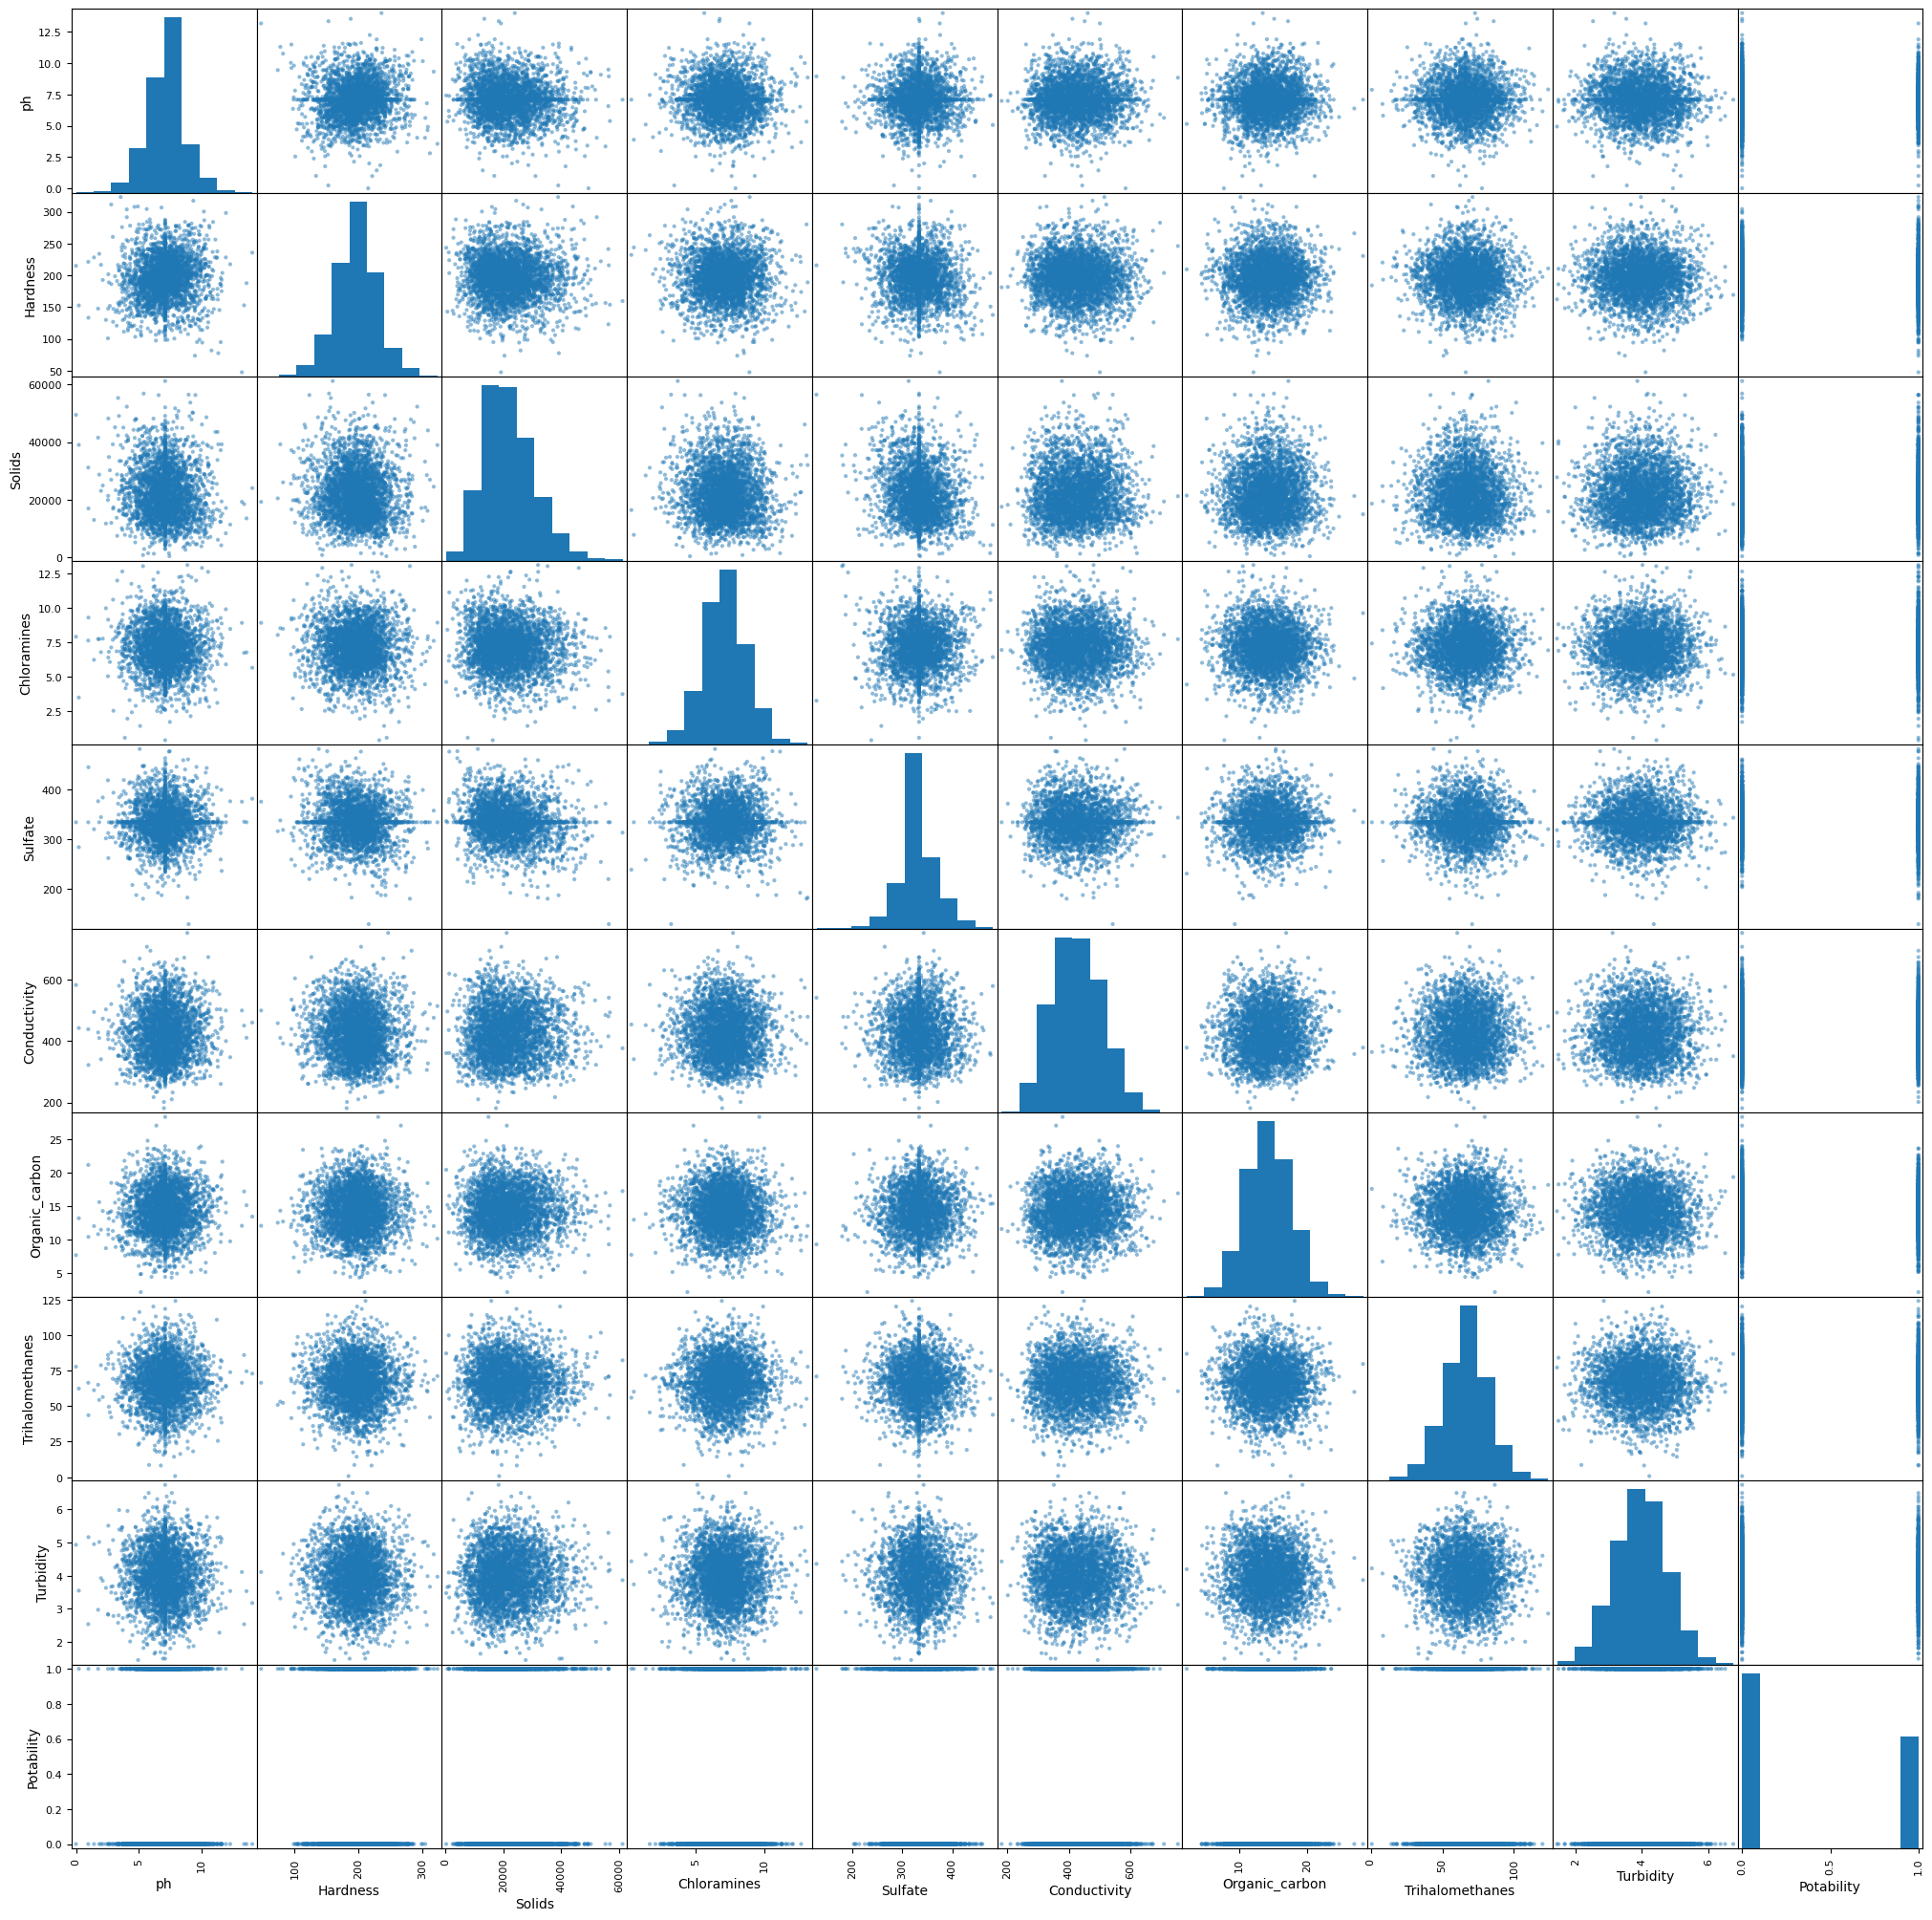

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize =(25,25))
plt.show()

# 5) Feature Selection

## Pearson's Correlation Coefficient :
Helps us  to find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

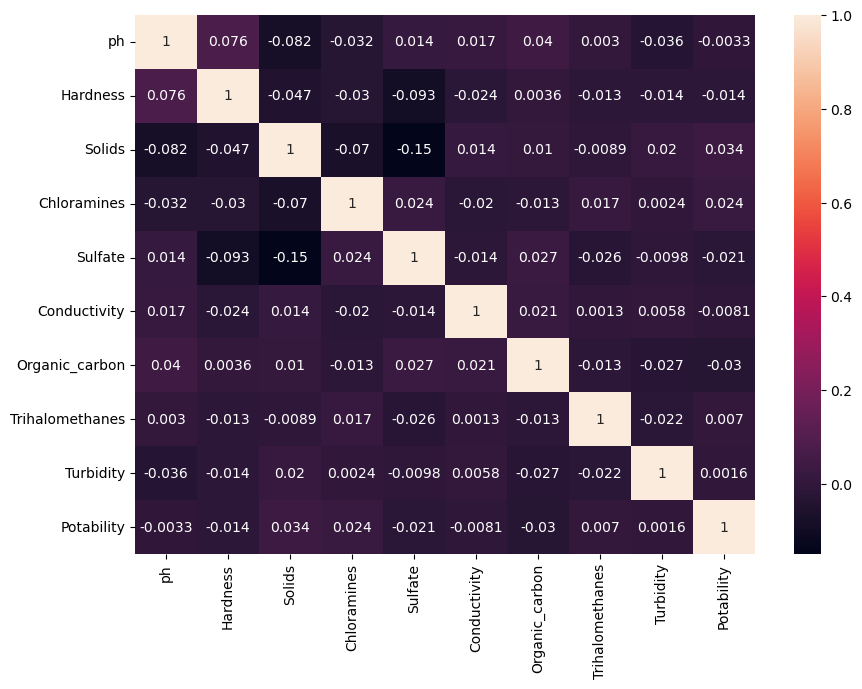

In [21]:
plt.figure(figsize = (10,7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)

### Conclusion:- Based on the absolute correlation values, it appears that "ph," "Hardness," "Chloramines," "Conductivity," and "Trihalomethanes" have relatively weak correlations with the target variable "Potability." These features have absolute correlations less than 0.01. so we can drop them

In [22]:
selected_df = df.drop(columns = ['ph','Hardness','Chloramines','Conductivity','Trihalomethanes'],axis = 'columns')

In [23]:
selected_df.head()

,Solids,Sulfate,Organic_carbon,Turbidity,Potability
0,20791.318981,368.516441,10.379783,2.963135,0
1,18630.057858,333.775777,15.180013,4.500656,0
2,19909.541732,333.775777,16.868637,3.055934,0
3,22018.417441,356.886136,18.436524,4.628771,0
4,17978.986339,310.135738,11.558279,4.075075,0


# 6) Handling Outliers
### Heres we have boxplot to identifying the outliers

2 — How can we Identify an outlier?

Using Box plots

Using Scatter plot

Using Z score

I've used Box Plots above in data visualization step to detect outliers.

3 — How am I treating the outliers ?

Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [24]:
from sklearn.preprocessing import QuantileTransformer
x=selected_df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Sloids', 'Sulfate','Organic_carbon','Turbidity','Potabidity']
df_new.head()

/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Sloids,Sulfate,Organic_carbon,Turbidity,Potabidity
0,0.494209,0.851859,0.112857,0.104108,0.0
1,0.391442,0.507508,0.610900,0.750398,0.0
2,0.447708,0.507508,0.778162,0.123562,0.0
3,0.547774,0.793812,0.895072,0.802284,0.0
4,0.358650,0.202581,0.202275,0.553574,0.0


In [25]:
df_new.head()

,Sloids,Sulfate,Organic_carbon,Turbidity,Potabidity
0,0.494209,0.851859,0.112857,0.104108,0.0
1,0.391442,0.507508,0.610900,0.750398,0.0
2,0.447708,0.507508,0.778162,0.123562,0.0
3,0.547774,0.793812,0.895072,0.802284,0.0
4,0.358650,0.202581,0.202275,0.553574,0.0


<Axes: xlabel='Turbidity'>

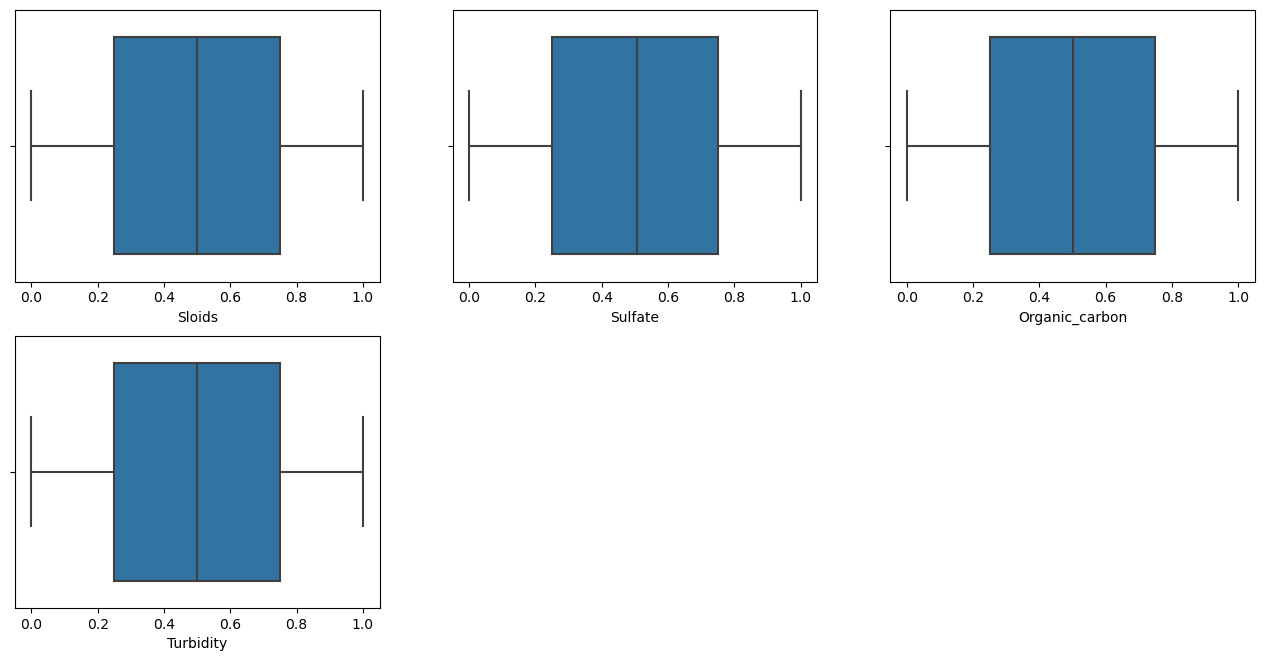

In [26]:
plt.figure(figsize=(16,12))
sns.set_style = 'whitegrid'
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Sloids'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['Sulfate'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Organic_carbon'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Turbidity'],data=df_new)

##  7) Split dataframe into X and Y

In [27]:
y = df_new['Potabidity']
X = df_new.drop('Potabidity',axis = 1)

In [28]:
X.head()

,Sloids,Sulfate,Organic_carbon,Turbidity
0,0.494209,0.851859,0.112857,0.104108
1,0.391442,0.507508,0.610900,0.750398
2,0.447708,0.507508,0.778162,0.123562
3,0.547774,0.793812,0.895072,0.802284
4,0.358650,0.202581,0.202275,0.553574


In [29]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potabidity, dtype: float64

## 8) TRAIN TEST SPLIT¶
The train-test split is a technique for evaluating the performance of a machine learning algorithm.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [31]:
X_train.head()

,Sloids,Sulfate,Organic_carbon,Turbidity
2128,0.923641,0.507508,0.579978,0.065056
1519,0.167031,0.981887,0.111128,0.219242
40,0.099030,0.196564,0.888881,0.280333
1151,0.020248,0.330353,0.346309,0.006995
2404,0.671698,0.353418,0.967051,0.042056


# 9) Build the Classification Algorithm

## 9.1)Logistic Regression:-
Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no."

Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.



In [32]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [33]:
model = LogisticRegression()
 # create the instance of LogisticRegression

In [34]:
model.fit(X_train,y_train) # fit the dataset in model

LogisticRegression()

In [35]:
y_pred = model.predict(X_test) 

In [36]:
accuracy = accuracy_score(y_test,y_pred)

In [37]:
accuracy

0.6280487804878049

### This means the model is 62.80% accurate

In [38]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Confusion Matrix:\n")

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


 F1:
 0.0

 Precision score is:
 0.0

 Recall score is:
 0.0

 Confusion Matrix:



/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhojraj/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bhojraj/anacond

<Axes: >

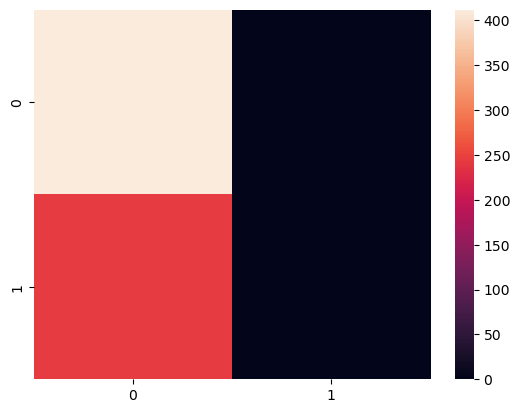

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred))